# Lib

In [17]:
from torchvision.datasets import CelebA
import os
import torch.nn as nn
import glob
import os
import torch
from torch.utils.data import Dataset
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
import torch
import math
# main libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from torch.utils.data import SubsetRandomSampler
from torch.nn import functional as F
from torch import nn
from torch import optim
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import Dataset
import math
import torchvision.transforms.functional as TF
import cv2
from keras.utils import image_dataset_from_directory
from torchvision import datasets, transforms
from torch.utils.data import random_split
from torch.nn.parameter import Parameter

from torch.nn import init
from torchvision.utils import make_grid
from collections import OrderedDict

import torch
from torch.utils.data import Dataset

from skimage import transform
import skimage.io as io
import numpy as np
from torchvision.utils import save_image

from torchvision.datasets import MNIST

In [18]:
os.chdir("/content/drive/MyDrive/AD Last Research")

FileNotFoundError: [WinError 2] The system cannot find the file specified: '/content/drive/MyDrive/AD Last Research'

# Helper Functions

In [28]:
from sklearn.manifold import TSNE

def get_2d_tsne(x):
    #tsne = TSNE(n_components=2, random_state=0,  learning_rate='auto', init='random')
    tsne = TSNE(n_components=2)
    x_2d = tsne.fit_transform(x)

    return x_2d

In [29]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [30]:
def show_tensor_images(image_tensor, num_images=25, size=(1, 128, 128)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in a uniform grid.
    '''
    image_unflat = image_tensor.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

In [31]:
def ploter(image, image_hat):
    """
    (H, W)
    """
    plt.figure()
    plt.subplot(1,2,1)
    #plt.imshow(image_hat, cmap='gray', vmin=-1, vmax=1)
    plt.imshow(image_hat)
    plt.tight_layout()
    plt.title("Reconstruct")

    plt.subplot(1,2,2)
    #plt.imshow(image, cmap='gray', vmin=-1, vmax=1)
    plt.imshow(image)
    plt.tight_layout()
    plt.title("Original")

    plt.show()

# Gen

In [32]:
from mymodels.generator import Generator_XL, Generator_S

In [33]:
generator = Generator_S(features=64,
                        img_size=32,
                        latent_dim=100,
                        channels=3)
count_parameters(generator)

1051139

# Disc

In [34]:
from mymodels.discriminator import Discriminator

In [35]:
discriminator = Discriminator(features=32, channels=3, img_size=32, optimization='gan')

In [36]:
count_parameters(discriminator)

390337

# Data

In [37]:
from dataset.customdataset import get_benchmark_dataset

In [144]:
img_size = 32
channels = 1
normal_label = 8
ano_label = 2
num_data = 500

In [145]:
# Datasets
train_normal_ds, _ = get_benchmark_dataset(dataset_name = 'mnist', train = True,
                                                      normal_label = normal_label, ano_label = ano_label,
                                                      num_data = num_data, img_size = img_size, channels = channels,
                                                      data_path = './MNIST', download=False)

test_normal_ds, test_ano_ds = get_benchmark_dataset(dataset_name = 'mnist', train = False,
                                                      normal_label = normal_label, ano_label = ano_label,
                                                      num_data = num_data, img_size = img_size, channels = channels,
                                                      data_path = './MNIST', download=False)

In [146]:
# Dataloader
train_normal_loader = DataLoader(train_normal_ds, batch_size=num_data, shuffle=True)
test_normal_loader = DataLoader(test_normal_ds, batch_size=num_data, shuffle=True)
test_ano_loader = DataLoader(test_ano_ds, batch_size=num_data, shuffle=True)

# Load Best Gen/Disc

In [104]:
latent_dim = 100
device = 'cpu'
epoch = 300

In [105]:
# Nets
generator = Generator_S(features=64,
                        img_size=img_size,
                        latent_dim=latent_dim,
                        channels=channels).to(device)

discriminator = Discriminator(features=16, channels=channels, img_size=img_size, optimization='gan', last_bias = False).to(device)

In [106]:
# Load
root_bp = f"./save_pts/vanillagan_epoch_{epoch}.pt"

info = torch.load(root_bp, map_location=torch.device('cpu'))
init_epoch = info['epoch']
generator.load_state_dict(info['state_dict_G'])
discriminator.load_state_dict(info['state_dict_D'])

<All keys matched successfully>

In [107]:
for x, y in train_normal_loader:
    real_images = x
    break
real_images.shape

torch.Size([500, 1, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


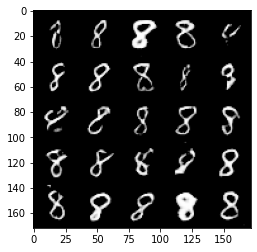

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


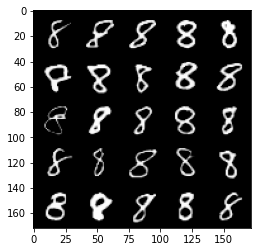

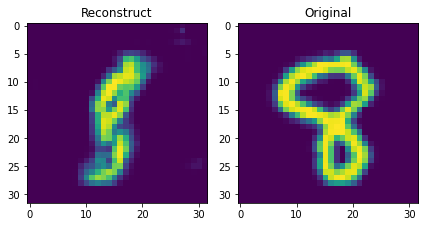

In [108]:
# Visualization ##############################################
z = torch.FloatTensor(np.random.normal(0, 1, (real_images.shape[0], latent_dim))).to(device)
gen_imgs = generator(z)


show_tensor_images(gen_imgs, size=(channels, img_size, img_size))
show_tensor_images(real_images, size=(channels, img_size, img_size))

num = math.floor(np.random.uniform(0, len(real_images)))
ploter(real_images.detach().cpu()[num][0], gen_imgs.detach().cpu()[num][0])

# TSNE
`gen_img` and `real_images`
and
FE Discri

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


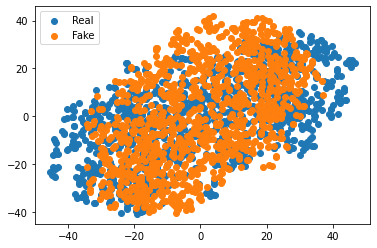

In [24]:
# Raw Data
real_images_2D = get_2d_tsne(real_images.flatten(1).detach().cpu())
gen_imgs_2D = get_2d_tsne(gen_imgs.flatten(1).detach().cpu())


plt.figure()
plt.scatter(real_images_2D[:, 0], real_images_2D[:, 1], label='Real')
plt.scatter(gen_imgs_2D[:, 0], gen_imgs_2D[:, 1], label='Fake')
plt.legend()

In [25]:
real_images.flatten(1).norm(2)

tensor(938.0126)

In [26]:
gen_imgs.flatten(1).norm(2)

tensor(930.6985, grad_fn=<NormBackward1>)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


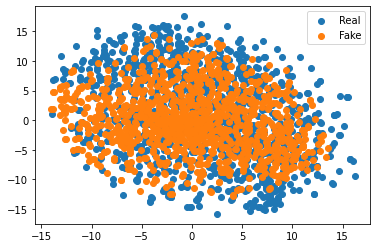

In [27]:
# Feature Space
real_images_features = discriminator.conv_layers(real_images)
gen_imgs_features = discriminator.conv_layers(gen_imgs)


real_images_features_2D = get_2d_tsne(real_images_features.flatten(1).detach().cpu())
gen_imgs_features_2D = get_2d_tsne(gen_imgs_features.flatten(1).detach().cpu())


plt.figure()
plt.scatter(real_images_features_2D[:, 0], real_images_features_2D[:, 1], label='Real')
plt.scatter(gen_imgs_features_2D[:, 0], gen_imgs_features_2D[:, 1], label='Fake')
plt.legend()

# ViT

In [28]:
device = 'cpu'

In [29]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=018c5724feec3993a263ad2e22cebc48e78579096f7ae8c12ff174c391a81cdd
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [30]:
!pip install ml_collections

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.0 MB/s 
  Created wheel for ml-collections: filename=ml_collections-0.1.1-py3-none-any.whl size=94524 sha256=5b25407e1063505beaa41440e4491206da9f1a5e6640c70c34234c99521e2fab
  Stored in directory: /root/.cache/pip/wheels/b7/da/64/33c926a1b10ff19791081b705879561b715a8341a856a3bbd2
Successfully built ml-collections


In [75]:
from models.modeling import CONFIGS, VisionTransformer
import wget
#filename = wget.download("https://storage.googleapis.com/vit_models/imagenet21k/ViT-B_16.npz")
filename = "ViT-B_16.npz"

In [76]:
model = VisionTransformer(CONFIGS['ViT-B_16'], img_size, num_classes=1, zero_head=True)

In [33]:
model.load_from(np.load(filename))
model = model.to(device)

load_pretrained: grid-size from 14 to 2


RuntimeError: ignored

### Data

In [109]:
from dataset import customdataset
from torch.utils.data import ConcatDataset

In [110]:
device = 'cpu'
targets_gen_imgs = 1
batch_size = 16

In [111]:
# train_fake_ds
z = torch.FloatTensor(np.random.normal(0, 1, (num_data, latent_dim))).to(device)
gen_imgs = generator(z)


if not isinstance(gen_imgs, np.ndarray):
    gen_imgs = gen_imgs.squeeze(1).detach().cpu().numpy()


train_gen_ds = customdataset.BaseDataset(gen_imgs, [targets_gen_imgs] * len(gen_imgs),
                                   customdataset.get_train_transforms(img_size, channels))

In [112]:
# Dataloader
train_ds = ConcatDataset([train_normal_ds, train_gen_ds])
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [113]:
for (x, y) in train_loader:
    x=x
    y=y

In [114]:
y

tensor([0, 0, 0, 1, 0, 1, 1, 1])

In [115]:
x.shape

torch.Size([8, 1, 32, 32])

In [116]:
len(train_ds)

1000

### Train

In [117]:
def freeze_model(model, layers=6):
    for i in range(layers):
        for p in model.transformer.encoder.layer[i].parameters():
            p.requires_grad = False

In [118]:
lr = 0.001 #4e-4
weight_decay = 5e-5
num_epochs = 100

In [87]:
device = 'cpu'
model = model.to(device)
freeze_model(model)
optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)
model.train()
#loss_funct = nn.CrossEntropyLoss()
loss_funct = nn.BCEWithLogitsLoss()

In [88]:
device = 'cpu'
model = model.to(device)

In [42]:
for epoch in range(1, num_epochs+1):
    total_num, total_loss = 0, 0
    for (x, y) in train_loader:
        x, y = x.to(device), y.to(device)
        x = x.repeat(1,3,1,1)
        optimizer.zero_grad()
        logits, _ = model(x)
        loss = loss_funct(logits.squeeze(1), y.to(torch.float))
        loss.backward()
        optimizer.step()
        total_num += x.size(0)
        total_loss += loss.item() * x.size(0)

    print(f'Training Epoch : {epoch}, Loss: {total_loss / total_num:.6f}')

Training Epoch : 1, Loss: 0.703769
Training Epoch : 2, Loss: 0.693067
Training Epoch : 3, Loss: 0.685479
Training Epoch : 4, Loss: 0.674465
Training Epoch : 5, Loss: 0.667134
Training Epoch : 6, Loss: 0.659732
Training Epoch : 7, Loss: 0.649178
Training Epoch : 8, Loss: 0.640937
Training Epoch : 9, Loss: 0.631762
Training Epoch : 10, Loss: 0.623180
Training Epoch : 11, Loss: 0.615529
Training Epoch : 12, Loss: 0.607939
Training Epoch : 13, Loss: 0.599498
Training Epoch : 14, Loss: 0.589168
Training Epoch : 15, Loss: 0.581854
Training Epoch : 16, Loss: 0.571228
Training Epoch : 17, Loss: 0.562144
Training Epoch : 18, Loss: 0.555530
Training Epoch : 19, Loss: 0.546693
Training Epoch : 20, Loss: 0.536200
Training Epoch : 21, Loss: 0.526186
Training Epoch : 22, Loss: 0.517007
Training Epoch : 23, Loss: 0.511779
Training Epoch : 24, Loss: 0.498851
Training Epoch : 25, Loss: 0.491990
Training Epoch : 26, Loss: 0.485363
Training Epoch : 27, Loss: 0.473236
Training Epoch : 28, Loss: 0.464406
T

In [43]:
torch.save({
    "ViT_BCE" : model.state_dict(),
            }, "./ViT_best_model.pt")

In [119]:
model.load_state_dict(
    torch.load("./results/ViT_research/ViT_best_model.pt", map_location=torch.device('cpu'))['ViT_BCE']
    )

<All keys matched successfully>

# TSNE

In [128]:
device = 'cpu'

### Data

In [147]:
for x, _ in test_normal_loader:
    x_normal = x
for x, _ in test_ano_loader:
    x_ano = x

z = torch.FloatTensor(np.random.normal(0, 1, (num_data, latent_dim))).to(device)
gen_imgs = generator(z)
x_normal_fake = gen_imgs

In [148]:
print(x_normal.shape)
print(x_ano.shape)
print(x_normal_fake.shape)

torch.Size([500, 1, 32, 32])
torch.Size([500, 1, 32, 32])
torch.Size([500, 1, 32, 32])


### 2D @ Pixel Space

In [149]:
x_normal_2D = get_2d_tsne(x_normal.flatten(1).detach())
x_ano_2D = get_2d_tsne(x_ano.flatten(1).detach())
x_normal_fake_2D = get_2d_tsne(x_normal_fake.flatten(1).detach())

B:\Anaconda_install_path\envs\deeplearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
B:\Anaconda_install_path\envs\deeplearning\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
B:\Anaconda_install_path\envs\deeplearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
B:\Anaconda_install_path\envs\deeplearning\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
B:\Anaconda_install_path\envs\deeplearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnin

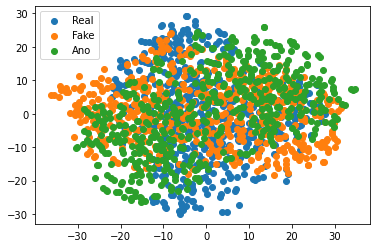

In [150]:
plt.figure()
plt.scatter(x_normal_2D[:, 0], x_normal_2D[:, 1], label='Real')
plt.scatter(x_normal_fake_2D[:, 0], x_normal_fake_2D[:, 1], label='Fake')
plt.scatter(x_ano_2D[:, 0], x_ano_2D[:, 1], label='Ano')
plt.legend()

### 2D @ Feature Space

In [151]:
model = model.to(device)

In [152]:
# Feature Space
_, x_normal_features = model(x_normal.repeat(1,3,1,1).to(device))
_, x_normal_fake_features = model(x_normal_fake.repeat(1,3,1,1).to(device))
_, x_ano_features = model(x_ano.repeat(1,3,1,1).to(device))

In [153]:
x_normal_features_2D = get_2d_tsne(x_normal_features.detach())
x_normal_fake_features_2D = get_2d_tsne(x_normal_fake_features.detach())
x_ano_features_2D = get_2d_tsne(x_ano_features.detach())

B:\Anaconda_install_path\envs\deeplearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
B:\Anaconda_install_path\envs\deeplearning\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
B:\Anaconda_install_path\envs\deeplearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
B:\Anaconda_install_path\envs\deeplearning\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
B:\Anaconda_install_path\envs\deeplearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnin

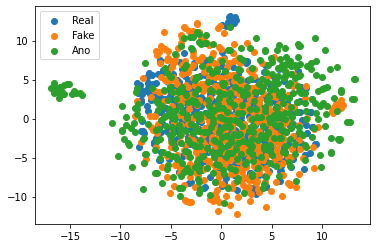

In [154]:
plt.figure()
plt.scatter(x_normal_features_2D[:, 0], x_normal_features_2D[:, 1], label='Real')
plt.scatter(x_normal_fake_features_2D[:, 0], x_normal_fake_features_2D[:, 1], label='Fake')
plt.scatter(x_ano_features_2D[:, 0], x_ano_features_2D[:, 1], label='Ano')
plt.legend()

In [160]:
logits_normal, _ = model(x_normal.repeat(1,3,1,1))
logits_normal_fake, _ = model(x_normal_fake.repeat(1,3,1,1))
logits_ano, _ = model(x_ano.repeat(1,3,1,1))

In [165]:
torch.sigmoid(logits_normal).mean()

tensor(0.0994, grad_fn=<MeanBackward0>)

In [166]:
torch.sigmoid(logits_ano).mean()

tensor(0.1170, grad_fn=<MeanBackward0>)

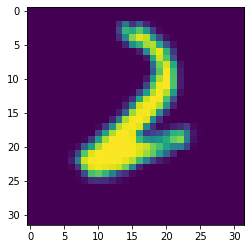

In [157]:
plt.imshow(
    x_ano[0][0]
)